## testing and evaluation between different prediction models for choosing best option for model export

In [4]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing_cleaned.csv", index_col=0)

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
2,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
3,26.03,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
4,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
dtypes: float64(7), object(4)
memory usage: 92.2+ KB


In [ ]:
df["Weather"].value_counts() # Clear, Rain, Snow
df["Traffic_Conditions"].value_counts() # Low, Medium, High
df["Time_of_Day"].value_counts() # Morning, Afternoon, Evening, Night
df["Day_of_Week"].value_counts() # Weekend, Weekday

Day_of_Week
Weekday    691
Weekend    292
Name: count, dtype: int64

In [30]:
test_df = df.copy()

test_df["Weather"] = test_df["Weather"].map({"Clear": 1, "Rain": 2, "Snow": 3}).astype(int)
test_df["Traffic_Conditions"] = test_df["Traffic_Conditions"].map({"Low": 1, "Medium": 2, "High": 3}).astype(int)
test_df["Day_of_Week"] = test_df["Day_of_Week"].map({"Weekday": 1, "Weekend": 2}).astype(int)
test_df["Time_of_Day"] = test_df["Time_of_Day"].map({"Morning": 1, "Afternoon": 2, "Evening": 3, "Night": 4}).astype(int)

test_df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82,36.2624
1,36.87,3,2,1.0,3,1,2.70,1.21,0.15,37.27,52.9032
2,30.33,3,1,4.0,1,1,3.48,0.51,0.15,116.81,36.4698
3,26.03,3,1,3.0,3,1,2.93,0.63,0.32,22.64,15.6180
4,8.64,2,2,2.0,2,1,2.55,1.71,0.48,89.33,60.2028


<Axes: >

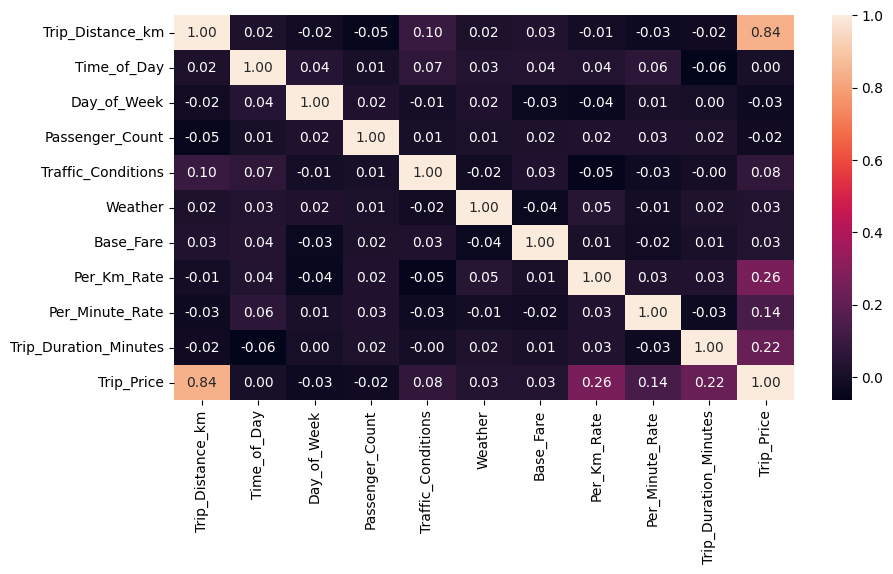

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)

sns.heatmap(test_df.corr(), annot=True, fmt=".2f")

## remove outliers for Trip_Distance_km and Trip_Price

In [35]:
test_df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070712,19.474948,1.2300,13.09500,26.030000,37.78500,146.067047
Time_of_Day,2.110885,0.918753,1.0000,1.00000,2.000000,3.00000,4.000000
Day_of_Week,1.297050,0.457191,1.0000,1.00000,1.000000,2.00000,2.000000
Passenger_Count,2.455748,1.081140,1.0000,2.00000,2.000000,3.00000,4.000000
Traffic_Conditions,1.733469,0.747139,1.0000,1.00000,2.000000,2.00000,3.000000
Weather,1.340793,0.582181,1.0000,1.00000,1.000000,2.00000,3.000000
Base_Fare,3.501299,0.849563,2.0100,2.77000,3.501299,4.20000,5.000000
Per_Km_Rate,1.234846,0.419926,0.5000,0.87000,1.234846,1.59000,2.000000
Per_Minute_Rate,0.292594,0.112630,0.1000,0.19500,0.290000,0.38000,0.500000
Trip_Duration_Minutes,62.125400,31.452064,5.0100,36.77000,62.125400,87.85000,119.840000


In [36]:
Q1 = 13.1
Q3 = 37.8
IQR = Q3-Q1

lower_bound_outlier = Q1-1.5*IQR
upper_bound_outlier = Q3+1.5*IQR
upper_bound_outlier

74.85

In [37]:
df_no_outliers = test_df[test_df["Trip_Distance_km"] < 74.9]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       963 non-null    float64
 1   Time_of_Day            963 non-null    int64  
 2   Day_of_Week            963 non-null    int64  
 3   Passenger_Count        963 non-null    float64
 4   Traffic_Conditions     963 non-null    int64  
 5   Weather                963 non-null    int64  
 6   Base_Fare              963 non-null    float64
 7   Per_Km_Rate            963 non-null    float64
 8   Per_Minute_Rate        963 non-null    float64
 9   Trip_Duration_Minutes  963 non-null    float64
 10  Trip_Price             963 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 90.3 KB


## train|val|test split

In [32]:
X, y = test_df.drop(columns="Trip_Price"), df["Trip_Price"]
test_df.shape, X.shape, y.shape

((983, 11), (983, 10), (983,))

In [33]:
X.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82
1,36.87,3,2,1.0,3,1,2.70,1.21,0.15,37.27
2,30.33,3,1,4.0,1,1,3.48,0.51,0.15,116.81
3,26.03,3,1,3.0,3,1,2.93,0.63,0.32,22.64
4,8.64,2,2,2.0,2,1,2.55,1.71,0.48,89.33


In [34]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size=0.11, random_state=42)
X_train_full.shape, X_train.shape, X_val.shape, X_test.shape

((884, 10), (786, 10), (98, 10), (99, 10))